# NYC shootings from 2006
### This project will go through every shooting registered sinc the year 2006 trying to answer the following questions:
### - Which borough has the highest shooting rate?
### - At what time of the day do most shootings happen in that borough?
### - Which race has the highest frequency as shooting victim? How likely is it that they will be a victim in a random shooting? In which age bracket do they fall in?
### - Which race has the highest frequency as shooter perpetuator? 

# Objective
### The main objective is to try to understand whether there might be a shooting issue within a specific ethnic group of people. The data was retrieved from the city of New York official website. This is the link: https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8/about_data

# 1. Data cleaning 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

crime_data = pd.read_csv('NYPD_Shooting_Incident_Data__Historic__20240121.csv')
crime_data.head(5)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [2]:
columns_to_exclude = ['INCIDENT_KEY', 'LOC_OF_OCCUR_DESC', 'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat']
crime_data_new = crime_data.drop(columns = columns_to_exclude, axis = 1)
crime_data_new.head(5)

,OCCUR_DATE,OCCUR_TIME,BORO,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,05/27/2021,21:30:00,QUEENS,False,18-24,M,BLACK
1,06/27/2014,17:40:00,BRONX,False,18-24,M,BLACK
2,11/21/2015,03:56:00,QUEENS,True,25-44,M,WHITE
3,10/09/2015,18:30:00,BRONX,False,<18,M,WHITE HISPANIC
4,02/19/2009,22:58:00,BRONX,True,45-64,M,BLACK


# 2. Which borough has the highest shooting rate?

In [3]:
crime_data_new.BORO.value_counts()

BORO
BROOKLYN         10933
BRONX             7937
QUEENS            4094
MANHATTAN         3572
STATEN ISLAND      776
Name: count, dtype: int64

### Since 2006 Brooklyn has the highest shooting rate with 10'933 shootings.

# 3. At what time of the day do most of the shootings happen in Brooklyn?

In [4]:
brook_crime = crime_data_new[crime_data_new.BORO == 'BROOKLYN'].reset_index(drop=True)
brook_crime.head(5)

,OCCUR_DATE,OCCUR_TIME,BORO,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,10/21/2020,21:36:00,BROOKLYN,True,25-44,M,BLACK
1,03/08/2010,19:41:00,BROOKLYN,True,18-24,M,BLACK
2,08/29/2010,01:27:00,BROOKLYN,False,25-44,M,BLACK
3,10/09/2021,20:17:00,BROOKLYN,False,25-44,M,BLACK
4,11/09/2008,20:13:00,BROOKLYN,False,25-44,M,BLACK HISPANIC


In [5]:
brook_crime.OCCUR_TIME = brook_crime.OCCUR_TIME.apply(lambda x: x[:2])
brook_crime.OCCUR_TIME = brook_crime.OCCUR_TIME.astype(int)

In [6]:
brook_crime.rename(columns={'OCCUR_DATE': 'date', 'OCCUR_TIME': 'time', 'BORO': 'boro', 'STATISTICAL_MURDER_FLAG': 'murder', 'VIC_AGE_GROUP': 'age_group', 'VIC_SEX': 'sex', 'VIC_RACE': 'race'}, inplace=True)
brook_crime.dtypes
brook_crime.head()
len(brook_crime)

10933

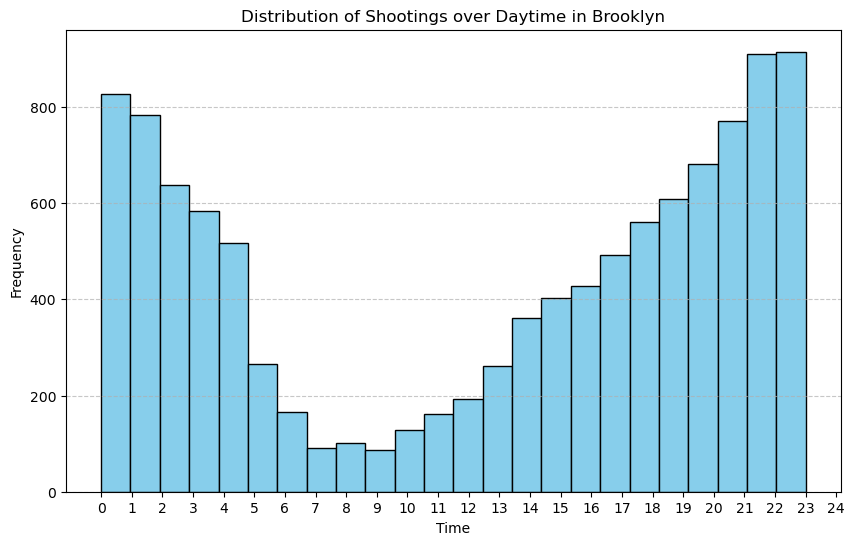

<Figure size 640x480 with 0 Axes>

In [7]:
hours = [x for x in range(25)]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(brook_crime['time'], bins=24, color='skyblue', edgecolor='black')  # Adjust bins and colors

# Add labels and title
plt.title('Distribution of Shootings over Daytime in Brooklyn')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(range(len((hours))), hours)

# Add grid for better readability (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
plt.clf()

### Most of the shootings in Brooklyn happen throughout the night between 8PM and 4AM.

# 4. Which race has the highest frequency as shooting victim? How likely is it that they will be a victim in a random shooting? In which age bracket do they fall in?

In [8]:
result = brook_crime.groupby(['race', 'murder']).size().reset_index(name='count')
result = result.sort_values(by='murder')
pivot_result = result.pivot(index='race', columns='murder', values='count')
print(pivot_result)


murder                           False   True 
race                                          
AMERICAN INDIAN/ALASKAN NATIVE     3.0     NaN
ASIAN / PACIFIC ISLANDER         104.0    34.0
BLACK                           7361.0  1730.0
BLACK HISPANIC                   458.0   107.0
UNKNOWN                           22.0     2.0
WHITE                            180.0    72.0
WHITE HISPANIC                   683.0   177.0


In [9]:
brook_murder = brook_crime[brook_crime.murder == True].reset_index(drop=True)

In [10]:
brook_murder.race.value_counts(normalize=True)

race
BLACK                       0.815269
WHITE HISPANIC              0.083412
BLACK HISPANIC              0.050424
WHITE                       0.033930
ASIAN / PACIFIC ISLANDER    0.016023
UNKNOWN                     0.000943
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Murdered by shootings per race')

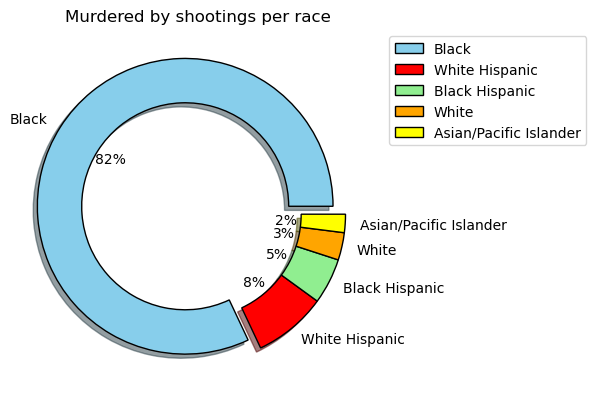

In [11]:
values = [0.82, 0.08, 0.05, 0.03, 0.02]
labels = ['Black', 'White Hispanic', 'Black Hispanic', 'White', 'Asian/Pacific Islander']
explode = (0.1, 0, 0, 0, 0)

custom_colors = ['skyblue', 'red', 'lightgreen', 'orange', 'yellow']

plt.pie(values, labels = labels, autopct = '%1.0f%%', explode = explode, shadow = True, textprops=dict(color="black"), colors = custom_colors, wedgeprops=dict(width=0.3, edgecolor='black'))
plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Murdered by shootings per race')

### 82% of shooting victims are black.

In [12]:
brook_murder.head()

,date,time,boro,murder,age_group,sex,race
0,10/21/2020,21,BROOKLYN,True,25-44,M,BLACK
1,03/08/2010,19,BROOKLYN,True,18-24,M,BLACK
2,07/26/2009,3,BROOKLYN,True,18-24,M,BLACK
3,10/31/2021,14,BROOKLYN,True,18-24,M,BLACK
4,06/05/2016,0,BROOKLYN,True,25-44,M,BLACK


In [13]:
age_murder_values = brook_murder.age_group.value_counts()
brook_murder.age_group.unique()

array(['25-44', '18-24', '<18', '45-64', '65+', 'UNKNOWN'], dtype=object)

In [14]:
categories = ['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN']

brook_murder.age_group = pd.Categorical(brook_murder.age_group, categories, ordered = True)

cat_age_murder = brook_murder.age_group.cat.codes
median_age_murder = np.median(cat_age_murder)
print('The median age of murdered people is {}'.format(categories[int(median_age_murder)]))
print(age_murder_values.iloc[2])

The median age of murdered people is 25-44
187


### The median age of shooting victims is in the bracket of 25-44 years of age.

In [15]:
# Probability of a crime being committed by a cat
prob_murder_black = 0.82

# Number of experiments
num_experiments = 1000

# Simulate the experiments
murder_occurred_by_black = np.random.choice([1, 0], size=num_experiments, p=[prob_murder_black, 1 - prob_murder_black])

# Calculate the proportion of crimes committed by cats
proportion_black_murder = np.mean(murder_occurred_by_black)

print(f"Probability of the next shooting victim being black: {proportion_black_murder:.2%}")


Probability of the next shooting victim being black: 84.00%


### In an experiment carried out 1000 times, out of the 1000 shootings 84% of them had a black person as a victim.

In [16]:
brook_murder.sex.value_counts()

sex
M    1919
F     203
Name: count, dtype: int64

# 5. Which race has the highest frequency as shooter perpetuator?

In [17]:
delete = ['INCIDENT_KEY', 'LOC_OF_OCCUR_DESC', 'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'VIC_SEX', 'VIC_RACE', 'VIC_AGE_GROUP', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat']
crime_data2 = crime_data.drop(columns = delete, axis = 1)
crime_data2.head()

,OCCUR_DATE,OCCUR_TIME,BORO,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE
0,05/27/2021,21:30:00,QUEENS,False,NaN,NaN,NaN
1,06/27/2014,17:40:00,BRONX,False,NaN,NaN,NaN
2,11/21/2015,03:56:00,QUEENS,True,NaN,NaN,NaN
3,10/09/2015,18:30:00,BRONX,False,NaN,NaN,NaN
4,02/19/2009,22:58:00,BRONX,True,25-44,M,BLACK


In [18]:
brook_shooter = crime_data2[crime_data2.BORO == 'BROOKLYN'].reset_index(drop=True)
brook_shooter.rename(columns={'OCCUR_DATE': 'date', 'OCCUR_TIME': 'time', 'BORO': 'boro', 'STATISTICAL_MURDER_FLAG': 'murder', 'PERP_AGE_GROUP': 'age', 'PERP_SEX': 'sex', 'PERP_RACE': 'race'}, inplace =True)
brook_shooter.race = brook_shooter.race.replace({'(null)': 'UNKNOWN'})
brook_shooter.dropna(subset=['race'], inplace =True)
brook_shooter.race = brook_shooter.race.fillna('UNKNOWN')
brook_shooter.race.value_counts(normalize=True)

race
BLACK                       0.723692
UNKNOWN                     0.155141
WHITE HISPANIC              0.063440
BLACK HISPANIC              0.039537
WHITE                       0.012327
ASIAN / PACIFIC ISLANDER    0.005863
Name: proportion, dtype: float64

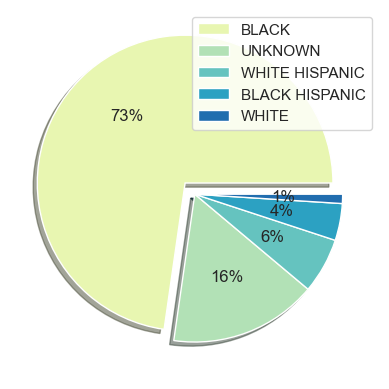

In [19]:
labels = ['BLACK', 'UNKNOWN', 'WHITE HISPANIC', 'BLACK HISPANIC', 'WHITE']
prop = [0.72, 0.16, 0.06, 0.04, 0.01]

explode = (0.1, 0, 0, 0, 0)
sns.set(style="whitegrid")

# Define the green-yellow color palette
green_yellow_palette = sns.color_palette("YlGnBu")

plt.pie(prop, explode = explode, colors = green_yellow_palette, shadow = True, autopct = '%1.0f%%')
plt.legend(labels)

### 73% of shootings in Brooklyn were carried out by a black person.

In [24]:
prob_shooter_black = 0.73

# Number of experiments
num_experiments = 1000

# Simulate the experiments
shooting_occurred_by_black = np.random.choice([1, 0], size=num_experiments, p=[prob_shooter_black, 1 - prob_shooter_black])

# Calculate the proportion of crimes committed by cats
proportion_black_murder = np.mean(shooting_occurred_by_black)

print(f"Probability of the next shooter being black: {proportion_black_murder:.2%}")

Probability of the next shooter being black: 70.10%


### In an experiment carried out 1000 times, out of the 1000 hypothetical shootings 70.10% were committed by a black person.

In [22]:
categories = ['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN']

brook_shooter.age = pd.Categorical(brook_shooter.age, categories, ordered = True)

cat_age_shooter = brook_shooter.age.cat.codes
median_age_shooter = np.median(cat_age_shooter)
print('The median age of shooters is {}'.format(categories[int(median_age_shooter)]))

The median age of shooters is 25-44


###  The median age of shooters falls in the age bracket of 25-44 years of age.

# 6. Conclusion
### In conclusion, it was possible to observe that as for the data available from 2006 in the borough of Brooklyn, the majority of shooting crimes were black people. The same applied to the perpetuators. This suggests that most of the shootings happen within the black portion of the population of Brooklyn. To have a complete population reference, the normalized population of Brooklyn is: White: 49.5% (non-Hispanic: 35.8%), African American: 35.8%, Hispanic or Latino of any race: 19.8%, Asian: 11.3%, Native American: 1.0%, Native Hawaiian and Pacific Islander: 0.1%.